<h1 style="text-align:center; font-family:Georgia; font-weight:bold; ">Imports</h1>

In [31]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import librosa.display
import matplotlib.pyplot as plt

<h1 style="text-align:center; font-family:Georgia; font-weight:bold; ">Constants and Global Variables</h1>

In [29]:
audioAndText = pd.read_csv('Collected Datasets/audioAndText.csv')
text = pd.read_csv('Collected Datasets/text.csv')

<h1 style="text-align:center; font-family:Georgia; font-weight:bold; ">Plots</h1>

In [36]:
def filterByMfccLength(df, minLength=50, maxLength=120, mfccColumn='mfcc'):
    def mfccLength(mfccStr):
        mfccVals = np.array(list(map(float, mfccStr.split(','))))
        return mfccVals.size // 13

    lengths = df[mfccColumn].apply(mfccLength)
    filteredDf = df[(lengths >= minLength) & (lengths <= maxLength)].copy()
    
    print(f"Original samples count: {len(df)}")
    print(f"Samples after filtering between {minLength} and {maxLength}: {len(filteredDf)}")
    print(f"Dropped samples: {len(df) - len(filteredDf)}")
    
    return filteredDf

audioAndText = filterByMfccLength(audioAndText)
audioAndText.to_csv('Collected Datasets/audioAndText.csv', index=False)


Original samples count: 6102
Samples after filtering between 50 and 120: 6074
Dropped samples: 28


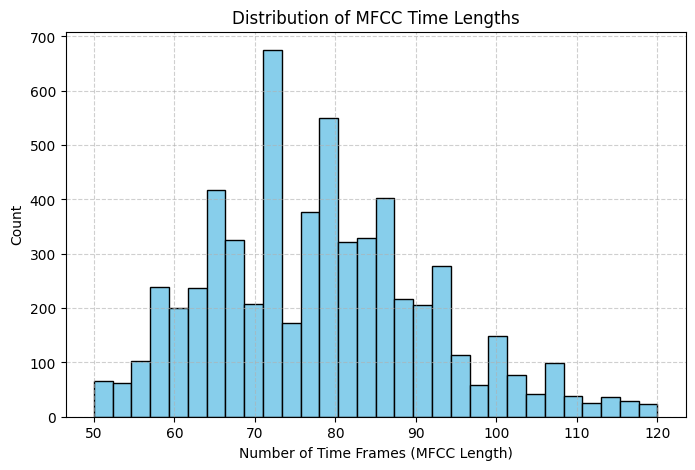

In [37]:
def plotMfccLengthsWithStats(df):
    lengths = []
    for mfcc_str in df['mfcc']:
        mfcc_vals = np.array(list(map(float, mfcc_str.split(','))))
        time_steps = mfcc_vals.size // 13  
        lengths.append(time_steps)
    
    plt.figure(figsize=(8, 5))
    plt.hist(lengths, bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of MFCC Time Lengths')
    plt.xlabel('Number of Time Frames (MFCC Length)')
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

plotMfccLengthsWithStats(audioAndText)


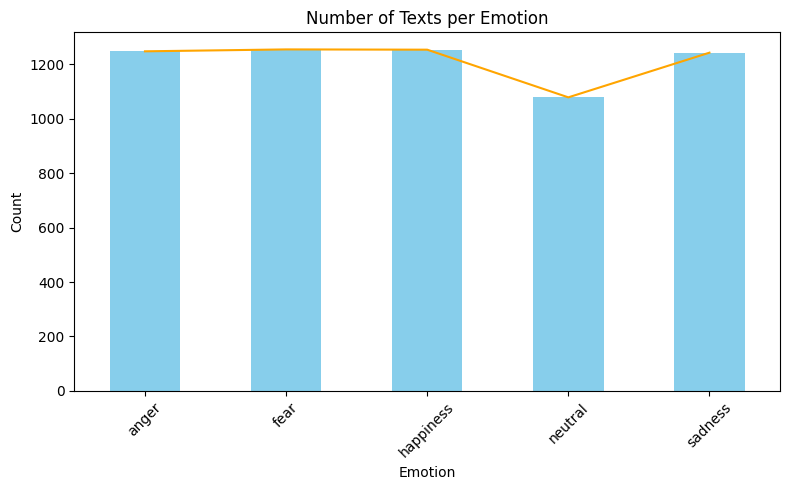

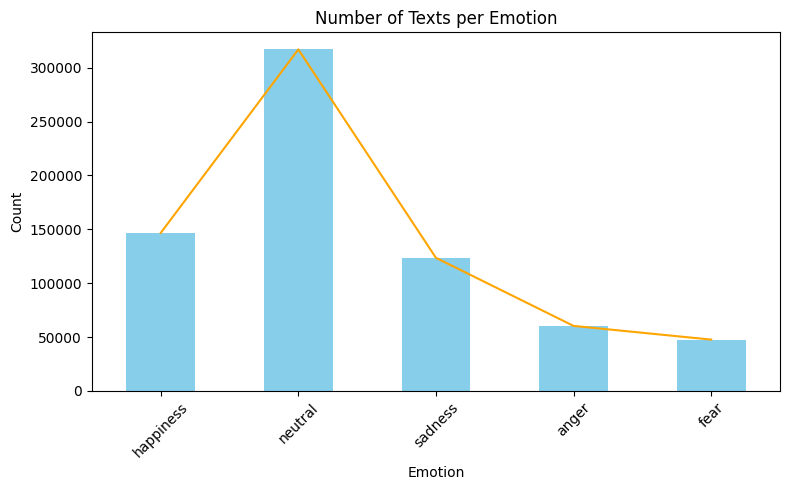

In [38]:
def plotEmotionCounts(df):
    emotionCounts = df.groupby('Emotion').size().reindex(df['Emotion'].unique())
    
    plt.figure(figsize=(8, 5))
    emotionCounts.plot(kind='bar', color='skyblue')
    
    plt.plot(range(len(emotionCounts)), emotionCounts.values, color='orange', label='Trend')

    
    plt.title('Number of Texts per Emotion')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plotEmotionCounts(audioAndText)
plotEmotionCounts(text)


In [32]:
def plotMeanMfccHeatmapByEmotion(df, mfccColumn='mfcc', emotionColumn='emotion'):
    emotions = df[emotionColumn].unique()

    for emotion in emotions:
        mfccList = df[df[emotionColumn] == emotion][mfccColumn].tolist()
        mfccArrays = []
        
        for mfccStr in mfccList:
            mfccVals = np.array(list(map(float, mfccStr.split(','))))
            timeSteps = mfccVals.size // 13
            mfccArrays.append(mfccVals.reshape(13, timeSteps))
        
        meanMfcc = np.mean(mfccArrays, axis=0)

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(meanMfcc, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Mean MFCC Heatmap for Emotion: {emotion}')
        plt.ylabel('MFCC Coefficients')
        plt.xlabel('Time')
        plt.tight_layout()
        plt.show()
        
plotMeanMfccHeatmapByEmotion(audioAndText, mfccColumn='mfcc', emotionColumn='Emotion')


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1268, 13) + inhomogeneous part.